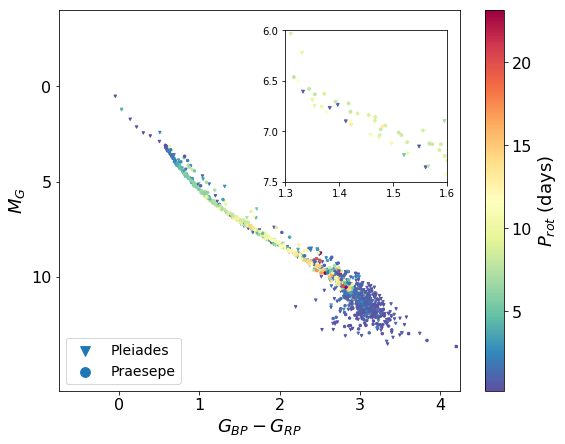

<Figure size 576x432 with 0 Axes>

In [70]:
## Current issue: Hyades does not show up on legend, but shows up in graph (currently colored black, not based on its rot periods)

import pandas as panda
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
from IPython.display import set_matplotlib_formats

def main():
    Pleiades = panda.read_csv("../Pleiades/Pleiades(With Rotation).csv")
    Praesepe = panda.read_csv("../Praesepe/Praesepe(With Rotation).csv")
    Hyades = panda.read_csv("../Hyades/Hyades(With Rotation).csv")
    PraesepeDistMod = distMod(Praesepe['parallax'])
    PleiadesDistMod = distMod(Pleiades['parallax'])
    HyadesDistMod = distMod(Hyades['parallax'])
    
    
    
    # Using Davenports colormap
    cm = plt.cm.get_cmap('Spectral_r')
    fig, ax1 = plt.subplots(figsize=(9,7))
    
    plt.scatter(Pleiades["bp_rp"], Pleiades["phot_g_mean_mag"]-PleiadesDistMod, marker = "v", s = 6,c = Pleiades["Prot1"], label = "Pleiades", cmap = cm)
    plt.scatter(Praesepe["bp_rp"], Praesepe["phot_g_mean_mag"]-PraesepeDistMod, marker = "o", s = 6, c = Praesepe["Prot1"], label = "Praesepe", cmap = cm)
    plt.scatter(Hyades["bp_rp"], Hyades["phot_g_mean_mag"]-HyadesDistMod, marker = "x", s = 6, c = Hyades["K2Per"], cmap = cm)
    plt.ylabel("$M_G$")
    plt.xlabel("$G_{BP} - G_{RP}$")
    plt.legend(loc = "lower left", markerscale = 4)
    plt.xlim(-0.75, 4.25)
    plt.xticks([0, 1, 2, 3, 4])
    plt.ylim(16, -4)
    plt.yticks([0, 5, 10])
    
    # Setting up colorbar after colormap has been defined
    cb = plt.colorbar()
    cb.set_label("$P_{rot}$ (days)")
    
    # Defining the inset plot
    ax2 = fig.add_axes([0.475, 0.54, 0.25, 0.3])
    ax2.tick_params(labelsize = 10)
    ax2.scatter(Pleiades["bp_rp"], Pleiades["phot_g_mean_mag"] - PleiadesDistMod, marker = "v", s = 8, c = Pleiades["Prot1"], cmap = cm)
    ax2.scatter(Praesepe["bp_rp"], Praesepe["phot_g_mean_mag"]-PraesepeDistMod, marker = "o", s = 8, c = Praesepe["Prot1"], cmap = cm)
    ax2.scatter(Hyades["bp_rp"], Hyades["phot_g_mean_mag"]-HyadesDistMod, marker = "x", s = 6, c = Hyades["K2Per"], cmap = cm)    
    ax2.set_xlim(1.3,1.6)
    ax2.set_ylim(7.5, 6)
    ax2.set_yticks([7.5, 7, 6.5, 6])


                    
    # Using Davenports image quality code:
    set_matplotlib_formats('pdf', 'png')
    plt.rcParams['savefig.dpi'] = 200

    plt.rcParams['figure.autolayout'] = False
    plt.rcParams['figure.figsize'] = 8,6
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['font.size'] = 16
    plt.rcParams['lines.linewidth'] = 2.0
    plt.rcParams['lines.markersize'] = 8
    plt.rcParams['legend.fontsize'] = 14

    mp.rcParams['xtick.direction'] = 'out'
    mp.rcParams['ytick.direction'] = 'out'
    
    plt.show()
    plt.savefig("ClusterCMDWith Rotation.png")

def distMod(parallax):
    result = 5*(np.log10(1000/parallax)-1)
    return result

main()